In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = pd.Series([1,3,4,np.nan,6,8])

In [3]:
s

0     1
1     3
2     4
3   NaN
4     6
5     8
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [10]:
df

,A,B,C,D
2013-01-01,0.868362,0.156558,0.263619,0.041226
2013-01-02,-0.480030,-0.229957,0.003774,-0.843040
2013-01-03,-1.730713,-1.775864,-0.417897,-0.906080
2013-01-04,1.151656,0.600024,1.286908,0.470892
2013-01-05,1.481628,-0.868354,-0.058743,0.298252
2013-01-06,0.899309,-0.365555,-1.714416,-1.175684


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [16]:
df2 = pd.DataFrame({
        'A': 1, # default dtype=int64
        'B': pd.Timestamp('20130101'),
        'C': pd.Series(1, index=list(range(4)), dtype='float32'),
        'D': np.array([3] * 4, dtype='int32'),
        'E': pd.Categorical(['test','train','test','train']),
        'F': 'foo' # default dtype=object
    })

In [17]:
df2

,A,B,C,D,E,F
0,1,2013-01-01,1,3,test,foo
1,1,2013-01-01,1,3,train,foo
2,1,2013-01-01,1,3,test,foo
3,1,2013-01-01,1,3,train,foo


In [18]:
df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

See the top & bottom rows of the frame

In [20]:
df.head()

,A,B,C,D
2013-01-01,0.868362,0.156558,0.263619,0.041226
2013-01-02,-0.480030,-0.229957,0.003774,-0.843040
2013-01-03,-1.730713,-1.775864,-0.417897,-0.906080
2013-01-04,1.151656,0.600024,1.286908,0.470892
2013-01-05,1.481628,-0.868354,-0.058743,0.298252


In [21]:
df.tail(3)

,A,B,C,D
2013-01-04,1.151656,0.600024,1.286908,0.470892
2013-01-05,1.481628,-0.868354,-0.058743,0.298252
2013-01-06,0.899309,-0.365555,-1.714416,-1.175684


Display the index, columns, and the underlying numpy data

In [22]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [23]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [29]:
df.values

array([[ 0.86836213,  0.15655762,  0.26361913,  0.04122574],
       [-0.48002976, -0.22995721,  0.00377381, -0.84303953],
       [-1.73071298, -1.77586369, -0.4178968 , -0.90608008],
       [ 1.15165613,  0.60002405,  1.2869078 ,  0.47089231],
       [ 1.48162783, -0.86835384, -0.05874288,  0.29825207],
       [ 0.89930881, -0.36555453, -1.7144156 , -1.1756839 ]])

In [31]:
type(df.values)

numpy.ndarray

In [27]:
df4 = pd.date_range('20140101', freq='M', periods=5) # what about frequency based on months rather than days?

In [28]:
df4

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31'],
              dtype='datetime64[ns]', freq='M')

Describe shows a quick statistic summary of your data

In [32]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.365035,-0.413858,-0.106126,-0.352406
std,1.225613,0.830796,0.977279,0.704441
min,-1.730713,-1.775864,-1.714416,-1.175684
25%,-0.142932,-0.742654,-0.328108,-0.890320
50%,0.883835,-0.297756,-0.027485,-0.400907
75%,1.088569,0.059929,0.198658,0.233995
max,1.481628,0.600024,1.286908,0.470892


Transposing your data

In [33]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.868362,-0.480030,-1.730713,1.151656,1.481628,0.899309
B,0.156558,-0.229957,-1.775864,0.600024,-0.868354,-0.365555
C,0.263619,0.003774,-0.417897,1.286908,-0.058743,-1.714416
D,0.041226,-0.843040,-0.906080,0.470892,0.298252,-1.175684


Sorting by an axis

In [35]:
df.sort_index(axis=1, ascending=False) # this just sorts the axis 'A' 'B' 'C' 'D', not by any values

,D,C,B,A
2013-01-01,0.041226,0.263619,0.156558,0.868362
2013-01-02,-0.843040,0.003774,-0.229957,-0.480030
2013-01-03,-0.906080,-0.417897,-1.775864,-1.730713
2013-01-04,0.470892,1.286908,0.600024,1.151656
2013-01-05,0.298252,-0.058743,-0.868354,1.481628
2013-01-06,-1.175684,-1.714416,-0.365555,0.899309


Sorting by values

In [39]:
df.sort_values(by='B') # all rows stay locked.

,A,B,C,D
2013-01-03,-1.730713,-1.775864,-0.417897,-0.906080
2013-01-05,1.481628,-0.868354,-0.058743,0.298252
2013-01-06,0.899309,-0.365555,-1.714416,-1.175684
2013-01-02,-0.480030,-0.229957,0.003774,-0.843040
2013-01-01,0.868362,0.156558,0.263619,0.041226
2013-01-04,1.151656,0.600024,1.286908,0.470892


Selecting a single column, which yields a Series, equivalent to df.A

In [40]:
df['A']

2013-01-01    0.868362
2013-01-02   -0.480030
2013-01-03   -1.730713
2013-01-04    1.151656
2013-01-05    1.481628
2013-01-06    0.899309
Freq: D, Name: A, dtype: float64

In [41]:
df.A

2013-01-01    0.868362
2013-01-02   -0.480030
2013-01-03   -1.730713
2013-01-04    1.151656
2013-01-05    1.481628
2013-01-06    0.899309
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [42]:
df[0:3] # exclusive right interval endpoint

,A,B,C,D
2013-01-01,0.868362,0.156558,0.263619,0.041226
2013-01-02,-0.480030,-0.229957,0.003774,-0.843040
2013-01-03,-1.730713,-1.775864,-0.417897,-0.906080


In [43]:
df['20130102':'20130104'] # inclusive(?) right interval endpoint

,A,B,C,D
2013-01-02,-0.480030,-0.229957,0.003774,-0.843040
2013-01-03,-1.730713,-1.775864,-0.417897,-0.906080
2013-01-04,1.151656,0.600024,1.286908,0.470892


#### Selection by label

For getting a cross section using a label

In [44]:
df.loc[dates[0]]

A    0.868362
B    0.156558
C    0.263619
D    0.041226
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [46]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.868362,0.156558
2013-01-02,-0.480030,-0.229957
2013-01-03,-1.730713,-1.775864
2013-01-04,1.151656,0.600024
2013-01-05,1.481628,-0.868354
2013-01-06,0.899309,-0.365555


Showing label slicing, both endpoints are included

In [53]:
df.loc['20130102':'20130104',['A','B']] # index=dates, columns=ABCD

,A,B
2013-01-02,-0.480030,-0.229957
2013-01-03,-1.730713,-1.775864
2013-01-04,1.151656,0.600024


Reduction in the dimensions of the returned object

In [58]:
df.loc['20130102', ['A','B']] # in this case it's a series?

A   -0.480030
B   -0.229957
Name: 2013-01-02 00:00:00, dtype: float64

In [59]:
type(df.loc['20130102', ['A','B']]) # YEP

pandas.core.series.Series

For getting a scalar value

In [63]:
df.loc[dates[0],'A']

0.86836212829174686

For getting fast access to a scalar (equiv to the prior method)

In [68]:
df.at[dates[0],'A']

0.86836212829174686

#### Selection by Position
Select via the position of the passed integers

In [69]:
df.iloc[3] # series again, 4th row

A    1.151656
B    0.600024
C    1.286908
D    0.470892
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [73]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,1.151656,0.600024
2013-01-05,1.481628,-0.868354


By lists of integer position locations, similar to the numpy/python style

In [74]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.480030,0.003774
2013-01-03,-1.730713,-0.417897
2013-01-05,1.481628,-0.058743


For slicing rows explicitly

In [77]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.156558,0.263619
2013-01-02,-0.229957,0.003774
2013-01-03,-1.775864,-0.417897
2013-01-04,0.600024,1.286908
2013-01-05,-0.868354,-0.058743
2013-01-06,-0.365555,-1.714416


For getting a value explicitly

In [78]:
df.iloc[1,1]

-0.22995721120419454

For getting fast access to a scalar (equiv to the prior method)

In [79]:
df.iat[1,1]

-0.22995721120419454

#### Boolean Indexing

Using a single column’s values to select data.

In [81]:
df[df.A>0]

,A,B,C,D
2013-01-01,0.868362,0.156558,0.263619,0.041226
2013-01-04,1.151656,0.600024,1.286908,0.470892
2013-01-05,1.481628,-0.868354,-0.058743,0.298252
2013-01-06,0.899309,-0.365555,-1.714416,-1.175684


A where operation for getting.

In [82]:
df[df>0]

,A,B,C,D
2013-01-01,0.868362,0.156558,0.263619,0.041226
2013-01-02,NaN,NaN,0.003774,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,1.151656,0.600024,1.286908,0.470892
2013-01-05,1.481628,NaN,NaN,0.298252
2013-01-06,0.899309,NaN,NaN,NaN


Using the isin() method for filtering:

In [83]:
df2 = df.copy()
df2['E'] = ['one','one','two','three','four','three']

In [84]:
df2

,A,B,C,D,E
2013-01-01,0.868362,0.156558,0.263619,0.041226,one
2013-01-02,-0.480030,-0.229957,0.003774,-0.843040,one
2013-01-03,-1.730713,-1.775864,-0.417897,-0.906080,two
2013-01-04,1.151656,0.600024,1.286908,0.470892,three
2013-01-05,1.481628,-0.868354,-0.058743,0.298252,four
2013-01-06,0.899309,-0.365555,-1.714416,-1.175684,three


In [85]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.730713,-1.775864,-0.417897,-0.906080,two
2013-01-05,1.481628,-0.868354,-0.058743,0.298252,four


Setting a new column automatically aligns the data by the indexes

In [86]:
s1 = pd.Series([1,2,3,4,5,6], index = pd.date_range('20130102', periods=6))

In [87]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [88]:
df['F'] = s1

In [89]:
df # so the value 6 is missing because of alignment

,A,B,C,D,F
2013-01-01,0.868362,0.156558,0.263619,0.041226,NaN
2013-01-02,-0.480030,-0.229957,0.003774,-0.843040,1
2013-01-03,-1.730713,-1.775864,-0.417897,-0.906080,2
2013-01-04,1.151656,0.600024,1.286908,0.470892,3
2013-01-05,1.481628,-0.868354,-0.058743,0.298252,4
2013-01-06,0.899309,-0.365555,-1.714416,-1.175684,5


Setting values by label

In [90]:
df.at[dates[0],'A'] = 0

Setting values by position

In [92]:
df.iat[0,1] = 0

In [94]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.263619,0.041226,NaN
2013-01-02,-0.480030,-0.229957,0.003774,-0.843040,1
2013-01-03,-1.730713,-1.775864,-0.417897,-0.906080,2
2013-01-04,1.151656,0.600024,1.286908,0.470892,3
2013-01-05,1.481628,-0.868354,-0.058743,0.298252,4
2013-01-06,0.899309,-0.365555,-1.714416,-1.175684,5


Setting by assigning with a numpy array

In [96]:
df.loc[:,'D'] = np.array([5] * len(df))

In [97]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.263619,5,NaN
2013-01-02,-0.480030,-0.229957,0.003774,5,1
2013-01-03,-1.730713,-1.775864,-0.417897,5,2
2013-01-04,1.151656,0.600024,1.286908,5,3
2013-01-05,1.481628,-0.868354,-0.058743,5,4
2013-01-06,0.899309,-0.365555,-1.714416,5,5


A where operation with setting.

In [98]:
df2 = df.copy()
df2[df2>0] = -df2
df2 # all positive are negative now

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.263619,-5,NaN
2013-01-02,-0.480030,-0.229957,-0.003774,-5,-1
2013-01-03,-1.730713,-1.775864,-0.417897,-5,-2
2013-01-04,-1.151656,-0.600024,-1.286908,-5,-3
2013-01-05,-1.481628,-0.868354,-0.058743,-5,-4
2013-01-06,-0.899309,-0.365555,-1.714416,-5,-5


#### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.
Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [100]:
df1 = df.reindex(index=dates[0:4], columns = list(df.columns) + ['E'])

In [121]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.263619,5,NaN,NaN
2013-01-02,-0.480030,-0.229957,0.003774,5,1,NaN
2013-01-03,-1.730713,-1.775864,-0.417897,5,2,NaN
2013-01-04,1.151656,0.600024,1.286908,5,3,NaN


In [122]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [123]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.263619,5,NaN,1
2013-01-02,-0.480030,-0.229957,0.003774,5,1,1
2013-01-03,-1.730713,-1.775864,-0.417897,5,2,NaN
2013-01-04,1.151656,0.600024,1.286908,5,3,NaN


To drop any rows that have missing data.

In [124]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.48003,-0.229957,0.003774,5,1,1


Filling missing data

In [125]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.263619,5,5,1
2013-01-02,-0.480030,-0.229957,0.003774,5,1,1
2013-01-03,-1.730713,-1.775864,-0.417897,5,2,5
2013-01-04,1.151656,0.600024,1.286908,5,3,5


To get the boolean mask where values are nan

In [126]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


Operations in general exclude missing data.

Performing a descriptive statistic

In [127]:
df.mean() # per column

A    0.220308
B   -0.439951
C   -0.106126
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [128]:
df.mean(1) # per row

2013-01-01    1.315905
2013-01-02    1.058757
2013-01-03    0.615105
2013-01-04    2.207718
2013-01-05    1.910906
2013-01-06    1.763868
Freq: D, dtype: float64

In [129]:
s = pd.Series([1,3,5, np.nan, 6,8], index=dates).shift(2) # shifted 2 down

In [130]:
s

2013-01-01   NaN
2013-01-02   NaN
2013-01-03     1
2013-01-04     3
2013-01-05     5
2013-01-06   NaN
Freq: D, dtype: float64

In [133]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.263619,5,NaN
2013-01-02,-0.480030,-0.229957,0.003774,5,1
2013-01-03,-1.730713,-1.775864,-0.417897,5,2
2013-01-04,1.151656,0.600024,1.286908,5,3
2013-01-05,1.481628,-0.868354,-0.058743,5,4
2013-01-06,0.899309,-0.365555,-1.714416,5,5


In [134]:
df.sub(s, axis='index') # subtract using the series s from above (like a filter on each column)

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.730713,-2.775864,-1.417897,4,1
2013-01-04,-1.848344,-2.399976,-1.713092,2,0
2013-01-05,-3.518372,-5.868354,-5.058743,0,-1
2013-01-06,NaN,NaN,NaN,NaN,NaN


Applying functions to the data

In [135]:
df.apply(np.cumsum) # cumulative sum on each column

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.263619,5,NaN
2013-01-02,-0.480030,-0.229957,0.267393,10,1
2013-01-03,-2.210743,-2.005821,-0.150504,15,3
2013-01-04,-1.059087,-1.405797,1.136404,20,6
2013-01-05,0.422541,-2.274151,1.077661,25,10
2013-01-06,1.321850,-2.639705,-0.636755,30,15


In [136]:
df.apply(lambda x: x.max() - x.min())

A    3.212341
B    2.375888
C    3.001323
D    0.000000
F    4.000000
dtype: float64

In [137]:
df.apply(lambda x: x.max())

A    1.481628
B    0.600024
C    1.286908
D    5.000000
F    5.000000
dtype: float64

In [144]:
df.describe().loc['max'] # same as above

A    1.481628
B    0.600024
C    1.286908
D    5.000000
F    5.000000
Name: max, dtype: float64

In [160]:
%pylab inline
s = pd.Series(np.random.randint(0,7, size=10))

Populating the interactive namespace from numpy and matplotlib


(array([ 1.,  0.,  3.,  0.,  2.,  0.,  0.,  0.,  2.,  2.]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ]),
 <a list of 10 Patch objects>)

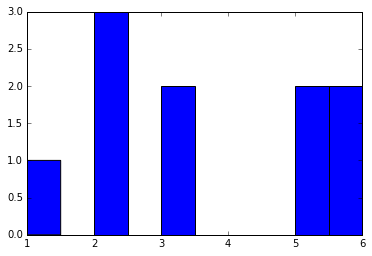

In [161]:
plt.hist(s)

In [147]:
plt.show()

In [162]:
s # dtype is now int64 (unlike in the tutorial)

0    2
1    6
2    2
3    3
4    6
5    1
6    2
7    5
8    3
9    5
dtype: int64

In [163]:
s.value_counts()

2    3
6    2
5    2
3    2
1    1
dtype: int64

#### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). 

In [164]:
s = pd.Series(['A','B','C','Aaba','Baca',np.nan, 'CABA', 'dog','cat'])

In [166]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

##### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with concat():

In [167]:
df = pd.DataFrame(np.random.randn(10,4))

In [168]:
df

,0,1,2,3
0,-0.312194,-0.203804,-0.320096,0.385638
1,0.082351,1.443868,-1.232028,0.415933
2,0.236304,1.232210,0.371730,0.601898
3,-0.759646,0.558589,-0.878401,1.198437
4,0.759917,-0.475484,-0.634020,-1.261012
5,-0.462961,-0.166287,-0.371925,-0.576109
6,-0.236076,-1.061799,-0.389695,2.646204
7,-1.224767,-0.328354,-0.311855,-0.967542
8,-1.404278,-0.644139,0.944804,0.360481
9,0.177934,-1.428802,-0.389115,-0.731350


In [169]:
# break it into pieces

pieces = [df[:3], df[3:7],df[7:]]

In [170]:
pieces

[          0         1         2         3
 0 -0.312194 -0.203804 -0.320096  0.385638
 1  0.082351  1.443868 -1.232028  0.415933
 2  0.236304  1.232210  0.371730  0.601898,
           0         1         2         3
 3 -0.759646  0.558589 -0.878401  1.198437
 4  0.759917 -0.475484 -0.634020 -1.261012
 5 -0.462961 -0.166287 -0.371925 -0.576109
 6 -0.236076 -1.061799 -0.389695  2.646204,
           0         1         2         3
 7 -1.224767 -0.328354 -0.311855 -0.967542
 8 -1.404278 -0.644139  0.944804  0.360481
 9  0.177934 -1.428802 -0.389115 -0.731350]

In [172]:
pd.concat(pieces)

,0,1,2,3
0,-0.312194,-0.203804,-0.320096,0.385638
1,0.082351,1.443868,-1.232028,0.415933
2,0.236304,1.232210,0.371730,0.601898
3,-0.759646,0.558589,-0.878401,1.198437
4,0.759917,-0.475484,-0.634020,-1.261012
5,-0.462961,-0.166287,-0.371925,-0.576109
6,-0.236076,-1.061799,-0.389695,2.646204
7,-1.224767,-0.328354,-0.311855,-0.967542
8,-1.404278,-0.644139,0.944804,0.360481
9,0.177934,-1.428802,-0.389115,-0.731350


SQL style merges

In [173]:
left = pd.DataFrame({'key': ['foo','foo'], 'lval': [1, 2]})

In [174]:
right = pd.DataFrame({'key':['foo','foo'], 'rval': [4, 5]})

In [175]:
left

,key,lval
0,foo,1
1,foo,2


In [176]:
right

,key,rval
0,foo,4
1,foo,5


In [177]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Append rows to a dataframe

In [178]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A','B','C','D'])

In [179]:
df

,A,B,C,D
0,0.422265,-1.152002,0.255102,0.860435
1,2.011188,-0.534353,-1.750147,1.237453
2,0.014004,-0.090706,1.084330,-0.317372
3,2.707892,-0.892593,0.426252,0.491444
4,-1.607326,-1.070264,0.160909,0.727563
5,1.450901,-0.955145,-0.013749,0.415263
6,-1.037273,1.294661,0.990073,1.438208
7,0.587239,-0.227991,-0.677409,-0.554705


In [180]:
s = df.iloc[3] # fourth row

In [181]:
s

A    2.707892
B   -0.892593
C    0.426252
D    0.491444
Name: 3, dtype: float64

In [186]:
df.append(s, ignore_index=True) # ignore_index=False means it will also pickup the original index number = 3

,A,B,C,D
0,0.422265,-1.152002,0.255102,0.860435
1,2.011188,-0.534353,-1.750147,1.237453
2,0.014004,-0.090706,1.084330,-0.317372
3,2.707892,-0.892593,0.426252,0.491444
4,-1.607326,-1.070264,0.160909,0.727563
5,1.450901,-0.955145,-0.013749,0.415263
6,-1.037273,1.294661,0.990073,1.438208
7,0.587239,-0.227991,-0.677409,-0.554705
8,2.707892,-0.892593,0.426252,0.491444


By “group by” we are referring to a process involving one or more of the following steps

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [188]:
df = pd.DataFrame({'A': ['foo','bar','foo','bar','foo','bar', 'foo','foo'], 
                   'B': ['one','one','two','three','two','two','one','three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)
                  })

In [189]:
df

,A,B,C,D
0,foo,one,-0.111839,1.744548
1,bar,one,-1.142793,-1.074481
2,foo,two,-1.808524,0.548469
3,bar,three,-0.908276,1.040078
4,foo,two,0.041764,0.400176
5,bar,two,-0.086988,0.232397
6,foo,one,-0.525274,-0.518085
7,foo,three,-0.984971,0.638935


In [191]:
df.groupby('A').sum() # takes only numerical columns

,C,D
A,,
bar,-2.138057,0.197995
foo,-3.388843,2.814043


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [192]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.142793 -1.074481
    three -0.908276  1.040078
    two   -0.086988  0.232397
foo one   -0.637113  1.226463
    three -0.984971  0.638935
    two   -1.766759  0.948645

### Reshaping
Stack

In [193]:
tuples = list(zip(*[
            ['bar','bar','baz','baz','foo','foo','qux','qux'],
            ['one','two','one','two','one','two','one','two']
            ]
    ))

In [194]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [204]:
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])

In [205]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [206]:
df

A         B
first second                    
bar   one    -0.221831 -1.081556
      two    -1.013467 -0.351839
baz   one     1.372485 -0.389124
      two    -0.136550 -1.194717
foo   one    -0.467299  0.988414
      two    -0.837857 -0.632401
qux   one     2.641259 -1.519310
      two    -0.832461 -0.552486

In [207]:
df2 = df[:4]

In [208]:
df2

A         B
first second                    
bar   one    -0.221831 -1.081556
      two    -1.013467 -0.351839
baz   one     1.372485 -0.389124
      two    -0.136550 -1.194717

The stack() method “compresses” a level in the DataFrame’s columns.

In [209]:
stacked = df2.stack()

In [214]:
stacked

first  second   
bar    one     A   -0.221831
               B   -1.081556
       two     A   -1.013467
               B   -0.351839
baz    one     A    1.372485
               B   -0.389124
       two     A   -0.136550
               B   -1.194717
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [211]:
stacked.unstack()

A         B
first second                    
bar   one    -0.221831 -1.081556
      two    -1.013467 -0.351839
baz   one     1.372485 -0.389124
      two    -0.136550 -1.194717

In [212]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.221831 -1.013467
      B -1.081556 -0.351839
baz   A  1.372485 -0.136550
      B -0.389124 -1.194717

In [215]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.221831  1.372485
       B -1.081556 -0.389124
two    A -1.013467 -0.136550
       B -0.351839 -1.194717

Pivot Tables

In [216]:
df = pd.DataFrame({
        'A': ['one','one','two','three'] * 3,
        'B': ['A','B', 'C'] * 4,
        'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
        'D': np.random.randn(12),
        'E': np.random.randn(12)
        
    })

In [217]:
df

,A,B,C,D,E
0,one,A,foo,-0.608073,-0.958310
1,one,B,foo,0.124325,0.930041
2,two,C,foo,-0.366234,-0.185620
3,three,A,bar,-0.270165,-1.471968
4,one,B,bar,-0.396515,0.555007
5,one,C,bar,1.335754,0.579329
6,two,A,foo,2.837483,0.641064
7,three,B,foo,-1.513734,-0.375683
8,one,C,foo,1.917551,1.469025
9,one,A,bar,0.848253,0.687440


We can produce pivot tables from this data very easily:

In [218]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.848253 -0.608073
      B -0.396515  0.124325
      C  1.335754  1.917551
three A -0.270165       NaN
      B       NaN -1.513734
      C  0.416861       NaN
two   A       NaN  2.837483
      B  0.692492       NaN
      C       NaN -0.366234

### Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [219]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [220]:
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [222]:
ts = pd.Series(np.random.randint(0,500, len(rng)), index=rng)

In [223]:
ts

2012-01-01 00:00:00    179
2012-01-01 00:00:01    138
2012-01-01 00:00:02    159
2012-01-01 00:00:03    191
2012-01-01 00:00:04    225
2012-01-01 00:00:05    178
2012-01-01 00:00:06     82
2012-01-01 00:00:07    406
2012-01-01 00:00:08    160
2012-01-01 00:00:09     67
2012-01-01 00:00:10    134
2012-01-01 00:00:11    370
2012-01-01 00:00:12    176
2012-01-01 00:00:13    287
2012-01-01 00:00:14    161
2012-01-01 00:00:15    125
2012-01-01 00:00:16    188
2012-01-01 00:00:17    256
2012-01-01 00:00:18    420
2012-01-01 00:00:19     80
2012-01-01 00:00:20    341
2012-01-01 00:00:21    304
2012-01-01 00:00:22    148
2012-01-01 00:00:23     43
2012-01-01 00:00:24    192
2012-01-01 00:00:25    350
2012-01-01 00:00:26     98
2012-01-01 00:00:27    361
2012-01-01 00:00:28    322
2012-01-01 00:00:29    201
                      ... 
2012-01-01 00:01:10    333
2012-01-01 00:01:11    373
2012-01-01 00:01:12    283
2012-01-01 00:01:13    355
2012-01-01 00:01:14    350
2012-01-01 00:01:15    402
2

In [224]:
len(ts)

100

In [225]:
ts.resample('5Min', how='sum')

2012-01-01    22487
Freq: 5T, dtype: int64

Time zone representation

In [226]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [227]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [228]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [229]:
ts

2012-03-06   -0.971696
2012-03-07   -1.703818
2012-03-08   -0.277408
2012-03-09   -0.622660
2012-03-10    0.530048
Freq: D, dtype: float64

In [230]:
ts_utc = ts.tz_localize('UTC')

In [231]:
ts_utc

2012-03-06 00:00:00+00:00   -0.971696
2012-03-07 00:00:00+00:00   -1.703818
2012-03-08 00:00:00+00:00   -0.277408
2012-03-09 00:00:00+00:00   -0.622660
2012-03-10 00:00:00+00:00    0.530048
Freq: D, dtype: float64

Convert to another time zone

In [232]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.971696
2012-03-06 19:00:00-05:00   -1.703818
2012-03-07 19:00:00-05:00   -0.277408
2012-03-08 19:00:00-05:00   -0.622660
2012-03-09 19:00:00-05:00    0.530048
Freq: D, dtype: float64

Converting between time span representations

In [233]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [234]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [235]:
ts

2012-01-31    0.519108
2012-02-29   -0.254115
2012-03-31    0.008592
2012-04-30   -0.026757
2012-05-31   -2.115740
Freq: M, dtype: float64

In [236]:
ps = ts.to_period()

In [237]:
ps

2012-01    0.519108
2012-02   -0.254115
2012-03    0.008592
2012-04   -0.026757
2012-05   -2.115740
Freq: M, dtype: float64

In [238]:
ps.to_timestamp()

2012-01-01    0.519108
2012-02-01   -0.254115
2012-03-01    0.008592
2012-04-01   -0.026757
2012-05-01   -2.115740
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [239]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [240]:
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='int64', freq='Q-NOV')

In [241]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [242]:
ts

1990Q1    0.063839
1990Q2   -1.250592
1990Q3   -1.100298
1990Q4    0.878578
1991Q1   -0.331688
1991Q2    0.101389
1991Q3    1.034408
1991Q4   -0.202779
1992Q1    0.671460
1992Q2   -0.535783
1992Q3    1.056087
1992Q4   -1.189141
1993Q1    1.434568
1993Q2   -0.852668
1993Q3   -0.543787
1993Q4    0.182398
1994Q1   -0.130826
1994Q2   -0.361223
1994Q3   -0.278387
1994Q4   -0.521700
1995Q1   -0.903409
1995Q2   -0.556874
1995Q3   -0.881072
1995Q4    0.820555
1996Q1    1.720638
1996Q2   -0.716571
1996Q3   -0.000020
1996Q4    0.473201
1997Q1   -0.306958
1997Q2    1.417187
1997Q3    0.386255
1997Q4    0.067039
1998Q1    1.509870
1998Q2   -0.565452
1998Q3    0.384028
1998Q4    0.609091
1999Q1    0.516009
1999Q2    0.181678
1999Q3    0.968229
1999Q4    0.299611
2000Q1    0.645026
2000Q2    0.341170
2000Q3    0.542083
2000Q4   -1.973178
Freq: Q-NOV, dtype: float64

In [244]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [245]:
ts

1990-03-01 09:00    0.063839
1990-06-01 09:00   -1.250592
1990-09-01 09:00   -1.100298
1990-12-01 09:00    0.878578
1991-03-01 09:00   -0.331688
1991-06-01 09:00    0.101389
1991-09-01 09:00    1.034408
1991-12-01 09:00   -0.202779
1992-03-01 09:00    0.671460
1992-06-01 09:00   -0.535783
1992-09-01 09:00    1.056087
1992-12-01 09:00   -1.189141
1993-03-01 09:00    1.434568
1993-06-01 09:00   -0.852668
1993-09-01 09:00   -0.543787
1993-12-01 09:00    0.182398
1994-03-01 09:00   -0.130826
1994-06-01 09:00   -0.361223
1994-09-01 09:00   -0.278387
1994-12-01 09:00   -0.521700
1995-03-01 09:00   -0.903409
1995-06-01 09:00   -0.556874
1995-09-01 09:00   -0.881072
1995-12-01 09:00    0.820555
1996-03-01 09:00    1.720638
1996-06-01 09:00   -0.716571
1996-09-01 09:00   -0.000020
1996-12-01 09:00    0.473201
1997-03-01 09:00   -0.306958
1997-06-01 09:00    1.417187
1997-09-01 09:00    0.386255
1997-12-01 09:00    0.067039
1998-03-01 09:00    1.509870
1998-06-01 09:00   -0.565452
1998-09-01 09:

#### Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame.

In [246]:
df = pd.DataFrame({"id": [1,2,3,4,5,6], "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

In [247]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type.

In [248]:
df["grade"] = df["raw_grade"].astype("category")

In [249]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [250]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [251]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [252]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [253]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [254]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Sorting is per order in the categories, not lexical order.

In [255]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [256]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Plotting

In [257]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods=1000))

In [258]:
ts = ts.cumsum()

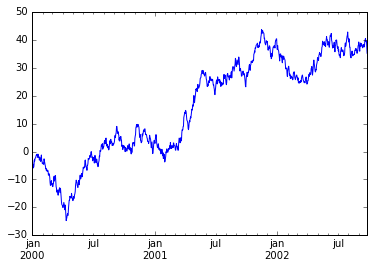

In [259]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [260]:
df = pd.DataFrame(np.random.randn(1000,4), index = ts.index, columns = ['A', 'B', 'C', 'D'])

In [261]:
df = df.cumsum()

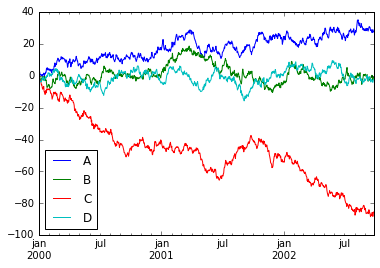

In [262]:
plt.figure(); df.plot(); plt.legend(loc='best')

#### Getting Data In/Out

In [263]:
df.to_csv('foo.csv')

In [264]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.413419,0.520819,-1.668241,1.149319
1,2000-01-02,1.764604,1.315897,-0.499743,0.293639
2,2000-01-03,2.781238,0.486899,-1.306340,-1.466746
3,2000-01-04,2.499425,0.461362,-1.968485,-2.317849
4,2000-01-05,0.766425,-1.669089,-2.992496,-3.341922
5,2000-01-06,0.894569,-2.076232,-2.730802,-3.664936
6,2000-01-07,0.385599,-3.196236,-3.054684,-3.551407
7,2000-01-08,0.318422,-2.772199,-4.527820,-3.954187
8,2000-01-09,0.448721,-2.885574,-5.726376,-3.263784
9,2000-01-10,0.249835,-1.387553,-5.448899,-2.611561


#### HDF5

In [265]:
df.to_hdf('foo.h5', 'df')

In [266]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,0.413419,0.520819,-1.668241,1.149319
2000-01-02,1.764604,1.315897,-0.499743,0.293639
2000-01-03,2.781238,0.486899,-1.306340,-1.466746
2000-01-04,2.499425,0.461362,-1.968485,-2.317849
2000-01-05,0.766425,-1.669089,-2.992496,-3.341922
2000-01-06,0.894569,-2.076232,-2.730802,-3.664936
2000-01-07,0.385599,-3.196236,-3.054684,-3.551407
2000-01-08,0.318422,-2.772199,-4.527820,-3.954187
2000-01-09,0.448721,-2.885574,-5.726376,-3.263784
2000-01-10,0.249835,-1.387553,-5.448899,-2.611561


Reading and writing to MS Excel

In [269]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [270]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.413419,0.520819,-1.668241,1.149319
2000-01-02,1.764604,1.315897,-0.499743,0.293639
2000-01-03,2.781238,0.486899,-1.306340,-1.466746
2000-01-04,2.499425,0.461362,-1.968485,-2.317849
2000-01-05,0.766425,-1.669089,-2.992496,-3.341922
2000-01-06,0.894569,-2.076232,-2.730802,-3.664936
2000-01-07,0.385599,-3.196236,-3.054684,-3.551407
2000-01-08,0.318422,-2.772199,-4.527820,-3.954187
2000-01-09,0.448721,-2.885574,-5.726376,-3.263784
2000-01-10,0.249835,-1.387553,-5.448899,-2.611561


In [271]:
pd.Series([True, False, False]).any()

True

In [272]:
pd.Series([True, False, False]).all()

False

In [274]:
pd.Series([True, False, False]).empty

False